In [8]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt

### Let's blow up a star

1. import 1D numerical hydrodynamics code and define an object that will store our simulation

In [9]:
# import a code file hydro3.py
import hydro3

# define a dictionary of arguments that we will pass to the hydrodynamics code specifying the problem to run
args = {'hname':'z25.0','htype':'zero','piston_eexp':1.3e51,'v_piston':1e9,'piston_stop':10,'r_outer':1e14,'rmin':1e8,'t_stop':1e7,'noplot':1}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

2. define our problem with initial and boundary conditions

In [10]:
# variables stored within our object h are accessed by h.variable_name
h.bctype=[h.FALLBACK, h.OUTFLOW]
h.itype=h.HEGER

3. store the initial condition data (taken from a stellar evolution code)

In [11]:
# set the simulation stop time to 0s
h.t_stop=0

# class "methods" (functions defined within a class) are accessed by h.function_name()
h.run()

# this is a lasting copy of the simulation at t=0
h_init = copy.deepcopy(h)

header:  ['grid', 'cell', 'outer', 'total', 'mass', 'cell', 'outer', 'radius', 'cell', 'outer', 'velocity', 'cell', 'density', 'cell', 'temperature', 'cell', 'pressure', 'cell', 'specific', 'energy', 'cell', 'specific', 'entropy', 'cell', 'angular', 'velocity', 'cell', 'A_bar', 'cell', 'Y_e', 'stability', 'NETWORK', 'neutrons', 'H1', 'He3', 'He4', 'C12', 'N14', 'O16', 'Ne20', 'Mg24', 'Si28', 'S32', 'Ar36', 'Ca40', 'Ti44', 'Cr48', 'Fe52', 'Fe54', 'Ni56', 'Fe56', "'Fe'"]
r inner:  405255076.7768671
     0 0.000e+00 1.625e-03
4.476e+33 2.500e+01 1.156e+48 2.890e+51 -3.204e+51 -3.120e+50


4. simulate the explosion! (numerically solve partial differential equations for the evolution of the fluid)

In [12]:
# set the simulation stop time to 10^6 s
h.t_stop=1e6

# run the simulation
h.run()

# the result here is the final simulation after 10^6 s
h_final = copy.deepcopy(h)

   100 1.713e-01 1.776e-03
4.476e+33 2.500e+01 2.214e+49 2.872e+51 -3.230e+51 -3.359e+50
   200 3.542e-01 1.879e-03
4.476e+33 2.500e+01 4.076e+49 2.887e+51 -3.298e+51 -3.701e+50
   300 4.776e-01 4.545e-04
4.476e+33 2.500e+01 6.389e+49 3.006e+51 -3.356e+51 -2.865e+50
   400 5.203e-01 4.564e-04
4.476e+33 2.500e+01 1.085e+50 3.093e+51 -3.340e+51 -1.388e+50
   500 5.746e-01 6.152e-04
4.476e+33 2.500e+01 1.439e+50 3.155e+51 -3.309e+51 -1.005e+49
   600 6.318e-01 5.329e-04
4.476e+33 2.500e+01 1.505e+50 3.214e+51 -3.278e+51 8.651e+49
   700 6.844e-01 5.176e-04
4.476e+33 2.500e+01 1.704e+50 3.264e+51 -3.252e+51 1.823e+50
   800 7.350e-01 5.049e-04
4.476e+33 2.500e+01 2.045e+50 3.307e+51 -3.226e+51 2.853e+50
   900 7.838e-01 4.765e-04
4.476e+33 2.500e+01 2.433e+50 3.347e+51 -3.202e+51 3.884e+50
  1000 8.294e-01 4.325e-04
4.476e+33 2.500e+01 2.847e+50 3.383e+51 -3.178e+51 4.889e+50
  1100 8.709e-01 4.018e-04
4.476e+33 2.500e+01 3.263e+50 3.415e+51 -3.157e+51 5.846e+50
  1200 9.103e-01 3.872e-04


 10100 1.500e+01 5.039e-03
4.476e+33 2.500e+01 5.972e+50 2.174e+51 -1.619e+51 1.152e+51
 10200 1.551e+01 5.214e-03
4.476e+33 2.500e+01 6.004e+50 2.150e+51 -1.598e+51 1.153e+51
 10300 1.604e+01 5.426e-03
4.476e+33 2.500e+01 6.036e+50 2.126e+51 -1.577e+51 1.153e+51
 10400 1.659e+01 5.599e-03
4.476e+33 2.500e+01 6.068e+50 2.102e+51 -1.556e+51 1.153e+51
 10500 1.717e+01 5.819e-03
4.476e+33 2.500e+01 6.099e+50 2.078e+51 -1.535e+51 1.153e+51
 10600 1.776e+01 6.030e-03
4.476e+33 2.500e+01 6.130e+50 2.055e+51 -1.515e+51 1.153e+51
 10700 1.837e+01 6.258e-03
4.476e+33 2.500e+01 6.160e+50 2.031e+51 -1.494e+51 1.153e+51
 10800 1.901e+01 6.488e-03
4.476e+33 2.500e+01 6.190e+50 2.008e+51 -1.474e+51 1.153e+51
 10900 1.967e+01 6.716e-03
4.476e+33 2.500e+01 6.220e+50 1.984e+51 -1.453e+51 1.153e+51
 11000 2.035e+01 6.921e-03
4.476e+33 2.500e+01 6.250e+50 1.961e+51 -1.433e+51 1.153e+51
 11100 2.105e+01 7.092e-03
4.476e+33 2.500e+01 6.287e+50 1.938e+51 -1.413e+51 1.153e+51
 11200 2.176e+01 7.072e-03
4.476

 19500 2.105e+02 3.628e-02
4.476e+33 2.500e+01 5.858e+50 1.175e+51 -6.047e+50 1.156e+51
 19600 2.141e+02 3.639e-02
4.476e+33 2.500e+01 5.841e+50 1.173e+51 -6.015e+50 1.156e+51
 19700 2.178e+02 3.660e-02
4.476e+33 2.500e+01 5.825e+50 1.172e+51 -5.984e+50 1.156e+51
 19800 2.215e+02 3.724e-02
4.476e+33 2.500e+01 5.810e+50 1.170e+51 -5.953e+50 1.156e+51
 19900 2.252e+02 3.752e-02
4.476e+33 2.500e+01 5.795e+50 1.169e+51 -5.925e+50 1.156e+51
 20000 2.290e+02 3.792e-02
4.476e+33 2.500e+01 5.780e+50 1.167e+51 -5.901e+50 1.155e+51
 20100 2.328e+02 3.828e-02
4.476e+33 2.500e+01 5.765e+50 1.167e+51 -5.896e+50 1.154e+51
 20200 2.366e+02 3.859e-02
4.476e+33 2.500e+01 5.771e+50 1.172e+51 -6.128e+50 1.137e+51
 20300 2.405e+02 3.897e-02
4.555e+33 2.500e+01 5.740e+50 1.147e+51 -5.632e+50 1.158e+51
 20400 2.444e+02 3.934e-02
4.575e+33 2.500e+01 5.726e+50 1.143e+51 -5.564e+50 1.160e+51
 20500 2.484e+02 3.968e-02
4.595e+33 2.500e+01 5.710e+50 1.140e+51 -5.492e+50 1.162e+51
 20600 2.524e+02 4.007e-02
4.595

 30000 9.122e+02 1.212e-01
5.092e+33 2.500e+01 5.603e+50 9.154e+50 -3.110e+50 1.165e+51
 30100 9.243e+02 1.229e-01
5.092e+33 2.500e+01 5.620e+50 9.116e+50 -3.090e+50 1.165e+51
 30200 9.367e+02 1.246e-01
5.092e+33 2.500e+01 5.637e+50 9.078e+50 -3.073e+50 1.164e+51
 30300 9.492e+02 1.264e-01
5.112e+33 2.500e+01 5.651e+50 9.036e+50 -3.037e+50 1.165e+51
 30400 9.619e+02 1.284e-01
5.112e+33 2.500e+01 5.669e+50 8.997e+50 -3.016e+50 1.165e+51
 30500 9.749e+02 1.305e-01
5.112e+33 2.500e+01 5.688e+50 8.957e+50 -2.996e+50 1.165e+51
 30600 9.880e+02 1.327e-01
5.112e+33 2.500e+01 5.707e+50 8.916e+50 -2.976e+50 1.165e+51
 30700 1.001e+03 1.349e-01
5.112e+33 2.500e+01 5.727e+50 8.875e+50 -2.959e+50 1.164e+51
 30800 1.015e+03 1.372e-01
5.132e+33 2.500e+01 5.745e+50 8.830e+50 -2.923e+50 1.165e+51
 30900 1.029e+03 1.396e-01
5.132e+33 2.500e+01 5.766e+50 8.787e+50 -2.902e+50 1.165e+51
 31000 1.043e+03 1.419e-01
5.132e+33 2.500e+01 5.788e+50 8.744e+50 -2.881e+50 1.165e+51
 31100 1.057e+03 1.443e-01
5.132

 39600 4.254e+03 1.075e+00
5.948e+33 2.500e+01 1.011e+51 2.652e+50 -1.064e+50 1.170e+51
 39700 4.364e+03 1.123e+00
6.007e+33 2.500e+01 1.015e+51 2.581e+50 -1.024e+50 1.171e+51
 39800 4.479e+03 1.172e+00
6.047e+33 2.500e+01 1.020e+51 2.514e+50 -1.005e+50 1.171e+51
 39900 4.598e+03 1.225e+00
6.087e+33 2.500e+01 1.024e+51 2.448e+50 -9.876e+49 1.171e+51
 40000 4.724e+03 1.283e+00
6.127e+33 2.500e+01 1.029e+51 2.384e+50 -9.780e+49 1.170e+51
 40100 4.855e+03 1.343e+00
6.186e+33 2.500e+01 1.033e+51 2.316e+50 -9.416e+49 1.170e+51
 40200 4.992e+03 1.410e+00
6.226e+33 2.500e+01 1.038e+51 2.253e+50 -9.352e+49 1.169e+51
 40300 5.137e+03 1.478e+00
6.286e+33 2.500e+01 1.042e+51 2.187e+50 -9.019e+49 1.170e+51
 40400 5.288e+03 1.554e+00
6.346e+33 2.500e+01 1.046e+51 2.123e+50 -8.761e+49 1.170e+51
 40500 5.448e+03 1.633e+00
6.405e+33 2.500e+01 1.050e+51 2.059e+50 -8.528e+49 1.170e+51
 40600 5.615e+03 1.723e+00
6.465e+33 2.500e+01 1.054e+51 1.996e+50 -8.309e+49 1.170e+51
 40700 5.792e+03 1.816e+00
6.525

### Let's explore the data

1. Make a plot of some of the quantities of the initial star

##### Q: What is the gas doing?

total mass in solar masses:  22.750811767751877


/Users/jade8030/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


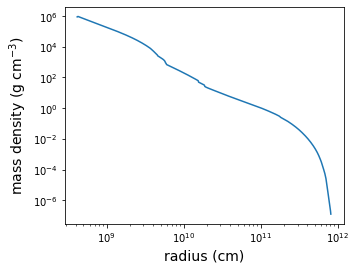

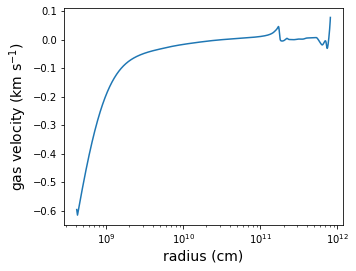

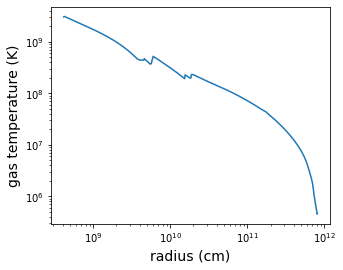

In [13]:
# constants in cgs units
mp=1.67e-24
kb=1.38e-16
m_sun=1.99e33

# font size for labels
fs=14

# define variables
r_init = h_init.zones.r
v_init = h_init.zones.v
rho_init = h_init.zones.d
e_init = h_init.zones.e
p_init = (h_init.gamma-1.)*e_init*rho_init

# make a few plots
plt.figure(figsize=(5,4))
plt.loglog(r_init,rho_init)
plt.xlabel(r'radius (cm)',fontsize=fs); plt.ylabel(r'mass density (g cm$^{-3}$)',fontsize=fs)

plt.figure(figsize=(5,4))
plt.semilogx(r_init,v_init/1e8)
plt.xlabel(r'radius (cm)',fontsize=fs); plt.ylabel(r'gas velocity (km s$^{-1}$)',fontsize=fs)

# this is temperature
plt.figure(figsize=(5,4))
plt.loglog(r_init,p_init/rho_init*mp/kb)
plt.xlabel(r'radius (cm)',fontsize=fs); plt.ylabel(r'gas temperature (K)',fontsize=fs)

print('total mass in solar masses: ',np.sum(h_init.zones.mass)/m_sun)

2. To the best of your ability, sketch what you think similar plots of density and temperature vs. radius might look like for the Sun

Hint: what is the mass of the Sun and its radius? what are the core and surface temperatures?

3. Using the concept of escape velocity, is the material gravitationally bound?

4. Now let's look at the final state. 

##### Q: What do you notice is different from before?

/Users/jade8030/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


total mass in solar masses:  18.792421866566155


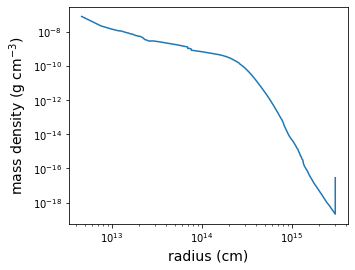

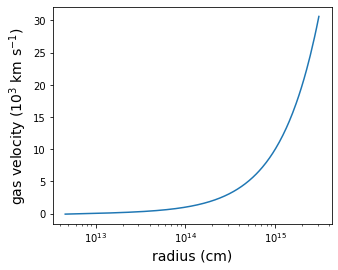

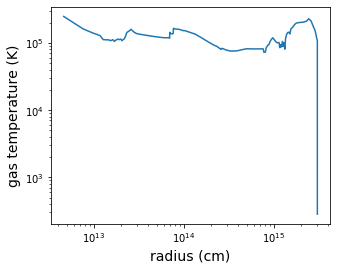

In [14]:
# define variables
r_final = h_final.zones.r
v_final = h_final.zones.v
rho_final = h_final.zones.d
e_final = h_final.zones.e
p_final = (h_final.gamma-1.)*e_final*rho_final

# make a few plots
plt.figure(figsize=(5,4))
plt.loglog(r_final,rho_final)
plt.xlabel(r'radius (cm)',fontsize=fs); plt.ylabel(r'mass density (g cm$^{-3}$)',fontsize=fs)

plt.figure(figsize=(5,4))
plt.semilogx(r_final,v_final/1e8)
plt.xlabel(r'radius (cm)',fontsize=fs); plt.ylabel(r'gas velocity ($10^3$ km s$^{-1}$)',fontsize=fs)

# this is temperature
plt.figure(figsize=(5,4))
plt.loglog(r_final,p_final/rho_final*mp/kb)
plt.xlabel(r'radius (cm)',fontsize=fs); plt.ylabel(r'gas temperature (K)',fontsize=fs)

print('total mass in solar masses: ',np.sum(h_final.zones.mass)/m_sun)

5. Describe how the conditions in the star have changed compared to the plots above. What seems to have happened to the star? What do you think you understand from this, and what open questions remain?